# Data Cleaning

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [75]:
# importing bitcoin price data
btc = pd.read_csv(r'/Users/davidscheider/anaconda_projects/Bitcoin Analytics/02 Data/Original Data/btcusd_1-min_data.csv', index_col = False)

In [4]:
print(btc.columns)

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [5]:
btc.head

<bound method NDFrame.head of             Timestamp       Open       High        Low      Close    Volume
0        1.325412e+09       4.58       4.58       4.58       4.58  0.000000
1        1.325412e+09       4.58       4.58       4.58       4.58  0.000000
2        1.325412e+09       4.58       4.58       4.58       4.58  0.000000
3        1.325412e+09       4.58       4.58       4.58       4.58  0.000000
4        1.325412e+09       4.58       4.58       4.58       4.58  0.000000
...               ...        ...        ...        ...        ...       ...
7222712  1.758844e+09  109006.00  109010.00  108975.00  108992.00  0.973164
7222713  1.758844e+09  108983.00  109006.00  108976.00  108979.00  1.169891
7222714  1.758844e+09  108981.00  108981.00  108909.00  108953.00  0.805693
7222715  1.758845e+09  108975.00  109039.00  108975.00  109039.00  0.319103
7222716  1.758845e+09  109045.00  109064.00  109042.00  109043.00  0.082596

[7222717 rows x 6 columns]>

# Data Cleaning btc

In [8]:
# Check for missing values
btc.isnull().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

In [10]:
# Check for duplicates
btc.duplicated().sum()

0

In [27]:
# convert to datetime
btc['Timestamp'] = pd.to_datetime(btc['Timestamp'])

In [78]:
# export btc
btc.to_csv("/Users/davidscheider/anaconda_projects/Bitcoin Analytics/02 Data/Prepared Data/btc_clean.csv", index=False)

# Import treasury yields data frame

In [51]:
# importing new data frame 10 year treasury yields
yields = pd.read_csv(r'/Users/davidscheider/anaconda_projects/Bitcoin Analytics/02 Data/Original Data/DGS10.csv', index_col = False)

In [52]:
print(yields.columns)

Index(['observation_date', 'DGS10'], dtype='object')


In [53]:
# Check if yields are float
print(yields.dtypes)
print(yields.head())

observation_date     object
DGS10               float64
dtype: object
  observation_date  DGS10
0       2015-09-25   2.17
1       2015-09-28   2.10
2       2015-09-29   2.05
3       2015-09-30   2.06
4       2015-10-01   2.05


In [54]:
# Check for missing values
yields.isnull().sum()

observation_date      0
DGS10               110
dtype: int64

In [55]:
# forward fill missing values
yields['DGS10'] = yields['DGS10'].fillna(method='ffill')

/var/folders/bz/7hwgnc95287cp83lwy4gfzth0000gn/T/ipykernel_40225/910887328.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  yields['DGS10'] = yields['DGS10'].fillna(method='ffill')


In [56]:
# Check if only weekdays have values
print(yields.head(20))

   observation_date  DGS10
0        2015-09-25   2.17
1        2015-09-28   2.10
2        2015-09-29   2.05
3        2015-09-30   2.06
4        2015-10-01   2.05
5        2015-10-02   1.99
6        2015-10-05   2.07
7        2015-10-06   2.05
8        2015-10-07   2.08
9        2015-10-08   2.12
10       2015-10-09   2.12
11       2015-10-12   2.12
12       2015-10-13   2.06
13       2015-10-14   1.99
14       2015-10-15   2.04
15       2015-10-16   2.04
16       2015-10-19   2.04
17       2015-10-20   2.08
18       2015-10-21   2.04
19       2015-10-22   2.04


In [57]:
# convert to datetime
yields['observation_date'] = pd.to_datetime(yields['observation_date'])

In [58]:
# Resample to daily frequency
yields = yields.set_index('observation_date').resample('D').ffill().reset_index()

In [59]:
print(yields.head(20))

   observation_date  DGS10
0        2015-09-25   2.17
1        2015-09-26   2.17
2        2015-09-27   2.17
3        2015-09-28   2.10
4        2015-09-29   2.05
5        2015-09-30   2.06
6        2015-10-01   2.05
7        2015-10-02   1.99
8        2015-10-03   1.99
9        2015-10-04   1.99
10       2015-10-05   2.07
11       2015-10-06   2.05
12       2015-10-07   2.08
13       2015-10-08   2.12
14       2015-10-09   2.12
15       2015-10-10   2.12
16       2015-10-11   2.12
17       2015-10-12   2.12
18       2015-10-13   2.06
19       2015-10-14   1.99


In [60]:
# check for duplicates
yields.duplicated().sum()

0

In [77]:
# export yields_clean
yields.to_csv("/Users/davidscheider/anaconda_projects/Bitcoin Analytics/02 Data/Prepared Data/yields_clean.csv", index=False)

# Importing google trends geo data frame

In [45]:
# importing new data frame google trends
google = pd.read_csv(r'/Users/davidscheider/anaconda_projects/Bitcoin Analytics/02 Data/Original Data/geoMap.csv', index_col = False)

/var/folders/bz/7hwgnc95287cp83lwy4gfzth0000gn/T/ipykernel_40225/4011971241.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  google = pd.read_csv(r'/Users/davidscheider/anaconda_projects/Bitcoin Analytics/02 Data/Original Data/geoMap.csv', index_col = False)


In [46]:
print(google.head(20))

   Kategorie: Alle Kategorien
0                        Land
1                 El Salvador
2               Liechtenstein
3                     Schweiz
4                  Österreich
5                   Slowenien
6                 Niederlande
7                     Nigeria
8                 Deutschland
9                     Andorra
10                    Curaçao
11                    Bermuda
12               Kaimaninseln
13               Sint Maarten
14                     Färöer
15                     Bhutan
16     Karibische Niederlande
17                     Island
18    St. Pierre und Miquelon
19                  Luxemburg


In [47]:
print(google.dtypes)
print(google.head())

Kategorie: Alle Kategorien    object
dtype: object
  Kategorie: Alle Kategorien
0                       Land
1                El Salvador
2              Liechtenstein
3                    Schweiz
4                 Österreich


In [48]:
google.isnull().sum()

Kategorie: Alle Kategorien    0
dtype: int64

In [79]:
# export google trends
google.to_csv("/Users/davidscheider/anaconda_projects/Bitcoin Analytics/02 Data/Prepared Data/google_clean.csv", index=False)

# Importing M2 seasonally adjusted

In [63]:
# importing new data frame M2 money supply
m2 = pd.read_csv(r'/Users/davidscheider/anaconda_projects/Bitcoin Analytics/02 Data/Original Data/M2SL.csv', index_col = False)

In [65]:
print(m2.head(20))

   observation_date     M2SL
0        2015-08-01  12093.7
1        2015-09-01  12154.8
2        2015-10-01  12206.1
3        2015-11-01  12297.5
4        2015-12-01  12368.7
5        2016-01-01  12506.0
6        2016-02-01  12578.2
7        2016-03-01  12629.0
8        2016-04-01  12708.0
9        2016-05-01  12775.0
10       2016-06-01  12835.4
11       2016-07-01  12889.7
12       2016-08-01  12973.9
13       2016-09-01  13034.2
14       2016-10-01  13107.5
15       2016-11-01  13181.0
16       2016-12-01  13226.1
17       2017-01-01  13300.7
18       2017-02-01  13367.3
19       2017-03-01  13428.7


In [67]:
# tranfer observation_date to datetime
m2['observation_date'] = pd.to_datetime(m2['observation_date'])

In [68]:
# check for missing values
m2.isnull().sum()

observation_date    0
M2SL                0
dtype: int64

In [69]:
m2 = m2.drop_duplicates(subset=['observation_date'])

In [70]:
# resample to daily values and impute missing ones
m2_daily = m2.set_index('observation_date').resample('D').ffill().reset_index()

In [76]:
# export m2_daily
m2_daily.to_csv("/Users/davidscheider/anaconda_projects/Bitcoin Analytics/02 Data/Prepared Data/m2_clean.csv", index=False)

# Importing new data frame S&P 500

In [80]:
# importing new data frame S&P500
sp = pd.read_csv(r'/Users/davidscheider/anaconda_projects/Bitcoin Analytics/02 Data/Original Data/SP500.csv', index_col = False)

In [81]:
sp.head(20)

,observation_date,SP500
0,2015-09-28,1881.77
1,2015-09-29,1884.09
2,2015-09-30,1920.03
3,2015-10-01,1923.82
4,2015-10-02,1951.36
5,2015-10-05,1987.05
6,2015-10-06,1979.92
7,2015-10-07,1995.83
8,2015-10-08,2013.43
9,2015-10-09,2014.89


In [83]:
# change to datetime
sp['observation_date'] = pd.to_datetime(sp['observation_date'])

In [85]:
# check for missing values
sp.isnull().sum()

observation_date     0
SP500               95
dtype: int64

In [86]:
# fill missing values
sp = sp.fillna(method='ffill')

/var/folders/bz/7hwgnc95287cp83lwy4gfzth0000gn/T/ipykernel_40225/3647749801.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sp = sp.fillna(method='ffill')


In [87]:
# resample to daily values
sp500_daily = sp.set_index('observation_date').resample('D').ffill().reset_index()

In [88]:
sp500_daily.head(20)

,observation_date,SP500
0,2015-09-28,1881.77
1,2015-09-29,1884.09
2,2015-09-30,1920.03
3,2015-10-01,1923.82
4,2015-10-02,1951.36
5,2015-10-03,1951.36
6,2015-10-04,1951.36
7,2015-10-05,1987.05
8,2015-10-06,1979.92
9,2015-10-07,1995.83


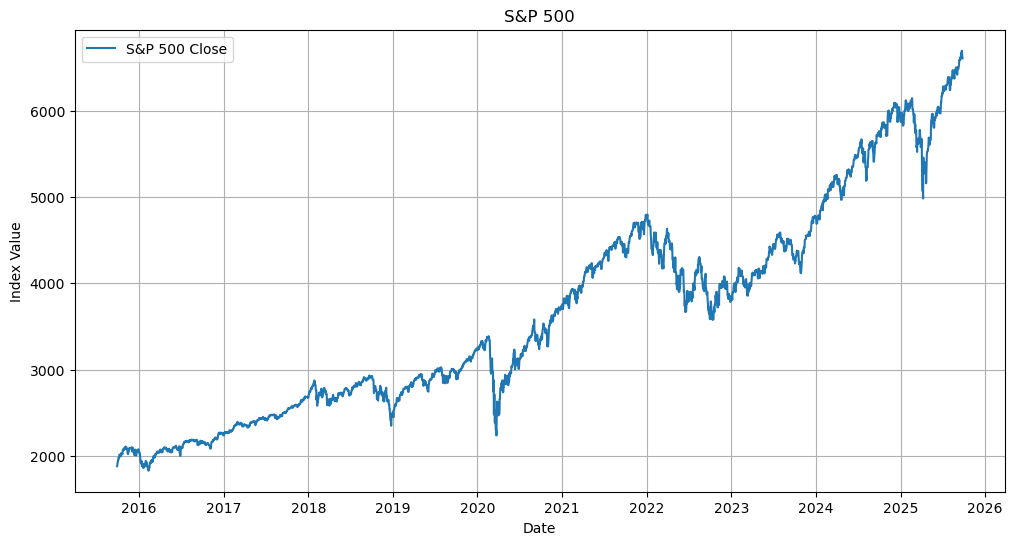

In [92]:
# Check plot
plt.figure(figsize=(12,6))
plt.plot(sp500_daily['observation_date'], sp500_daily['SP500'], label='S&P 500 Close')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('S&P 500')
plt.grid(True)
plt.legend()
plt.show()

In [93]:
# export sp500_daily
sp500_daily.to_csv("/Users/davidscheider/anaconda_projects/Bitcoin Analytics/02 Data/Prepared Data/sp500_clean.csv", index=False)

# Importing new data frame Google Trends time serie

In [3]:
# importing new data frame S&P500
gtrends = pd.read_csv(r'/Users/davidscheider/anaconda_projects/Bitcoin Analytics/02 Data/Original Data/multiTimeline.csv', index_col = False)

/var/folders/bz/7hwgnc95287cp83lwy4gfzth0000gn/T/ipykernel_72335/1066456424.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  gtrends = pd.read_csv(r'/Users/davidscheider/anaconda_projects/Bitcoin Analytics/02 Data/Original Data/multiTimeline.csv', index_col = False)


In [18]:
# skip first row 
gtrends = pd.read_csv(
    r'/Users/davidscheider/anaconda_projects/Bitcoin Analytics/02 Data/Original Data/multiTimeline.csv',
    skiprows=1
)

In [28]:
print(gtrends.head())

            Volume
Week              
2020-09-27      11
2020-10-04      11
2020-10-11      11
2020-10-18      16
2020-10-25      17


In [37]:
print(gtrends.columns)

Index(['Volume'], dtype='object')


In [39]:
# Skip first row ("Category: All categories")
gtrends = pd.read_csv(
    r'/Users/davidscheider/anaconda_projects/Bitcoin Analytics/02 Data/Original Data/multiTimeline.csv',
    skiprows=1,
    sep=',',
    engine='python'
)

In [40]:
print(gtrends.head())
print(gtrends.columns)

        Woche  Bitcoin: (Weltweit)
0  2020-09-27                   11
1  2020-10-04                   11
2  2020-10-11                   11
3  2020-10-18                   16
4  2020-10-25                   17
Index(['Woche', 'Bitcoin: (Weltweit)'], dtype='object')


In [42]:
print(gtrends.head())

            Bitcoin
Date               
2020-09-27       11
2020-10-04       11
2020-10-11       11
2020-10-18       16
2020-10-25       17


In [51]:
# set Index to 'Date'
gtrends.index = pd.to_datetime(gtrends.index)

# Check result
print(gtrends.head())
print(type(gtrends.index))

            Bitcoin
Date               
2020-09-27       11
2020-10-04       11
2020-10-11       11
2020-10-18       16
2020-10-25       17
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [50]:
# make chart daily
gtrends_daily = gtrends.resample('D').ffill()

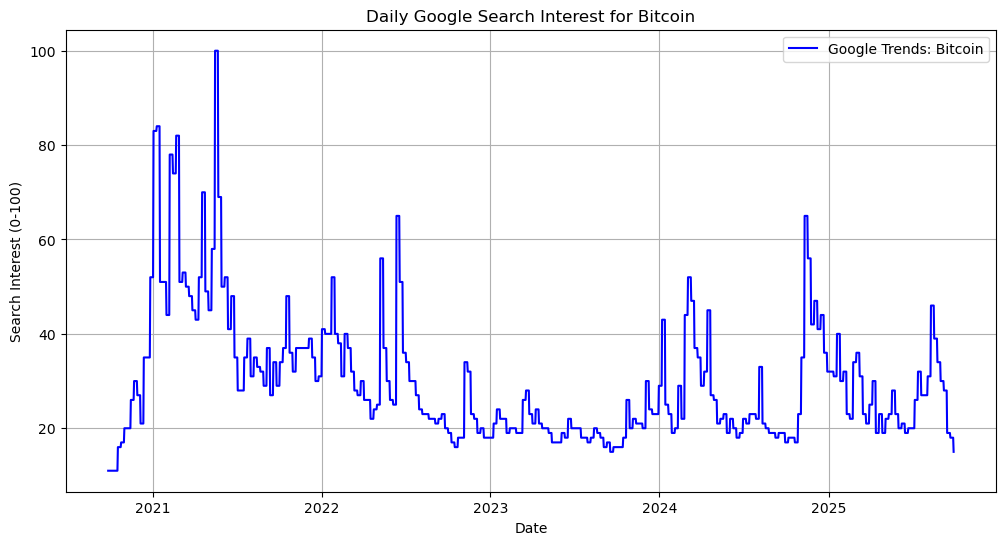

In [49]:
# plot chart
plt.figure(figsize=(12,6))
plt.plot(gtrends_daily.index, gtrends_daily['Bitcoin'], color='blue', linestyle='-', marker='', label='Google Trends: Bitcoin')
plt.title('Daily Google Search Interest for Bitcoin')
plt.xlabel('Date')
plt.ylabel('Search Interest (0-100)')
plt.grid(True)
plt.legend()
plt.show()

In [52]:
# export gtrends
gtrends_daily.to_csv("/Users/davidscheider/anaconda_projects/Bitcoin Analytics/02 Data/Prepared Data/gtrends_clean.csv", index=False)